# Face and Text Recognition Project #

## Load libraries and classifier

In [8]:
import zipfile
from zipfile import ZipFile
import PIL
from PIL import Image
from PIL import ImageDraw
import pytesseract
import cv2 as cv
import numpy as np
import os

#Loading the face detection classifier
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

## Define wordfinder function ## 
Uses input word and applies image processing and face recognition to look for a word in a file. If the word is found, it looks for and output faces in the file. If the word is found but no faces are found, it outputs a text stating this. 

In [9]:
#Define function to find and output faces based on word 
def wordfinder(word):

    if word in text:
  
        pil_img = Image.open(name)
        pil_img = pil_img.convert('RGB')
  
        drawing = ImageDraw.Draw(pil_img)
        
        #to show current image
        #pil_img.show()

        img = cv.imread(name)
        gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
            
        if faces is not ():
            
            counter = 0
            for x,y,w,h in faces:
                drawing.rectangle((x,y,x+w,y+h), outline='white')
                #cropping out the faces
                sub_face = img[y:y+h, x:x+w]
                #writing files names and saving cropped faces
                fname, ext = os.path.splitext(name)
                cv.imwrite(fname+"_cropped_"+str(counter)+ext, sub_face)
                counter += 1
    
            #Load cropped faces from save img files
            img_list = []
            for i in range(counter):
                cropped_file_name = fname + "_cropped_" + str(i) + ext
                new_img = Image.open(cropped_file_name)
                img_list.append(new_img)

        else:
                
            fname, ext = os.path.splitext(name)

        #Title of contact sheet per image processed
        title = 'Results found in file {}.png'.format(fname)

        img_title = Image.new('RGB', (800, 30), (255, 255, 255))
        d = ImageDraw.Draw(img_title)
        d.text((20, 12), title, fill=(0, 0, 0))
            
        #If loop to address the case when the algorithm finds the word but no faces
        if faces is ():

            title2 = 'But there were no faces in that file!'

            img_title2 = Image.new('RGB', (800, 30), (255, 255, 255))
            d2 = ImageDraw.Draw(img_title2)
            d2.text((20, 12), title2, fill=(0, 0, 0))

            one_picture_list = [img_title, img_title2]

            for pic in one_picture_list:
                all_picture_list.append(pic)

            return all_picture_list

        #This is the part that runs when the algorithm finds both the word and faces
        else:

            list_of_widths = []
            for pic in img_list:
                width = pic.width
                list_of_widths.append(width)

            min_width = min(list_of_widths)

            print('This is picture {}'.format(fname))
                
            #Creating contact sheet
            first_image=img_list[0]
            if len(img_list) >= 5:
                contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*4,first_image.height*2))
                x=0
                y=0
            else:
                contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*5,first_image.height*2))
                x=0
                y=0
    
            for img2 in img_list:

                contact_sheet.paste(img2, (x, y) )

                #Update X position
                if x+first_image.width >= contact_sheet.width:
                    x=0
                    y=y+first_image.height
                else:
                    x=x+img2.width

            #Resize and display the contact sheet
            contact_sheet = contact_sheet.resize((int(contact_sheet.width/2.1),int(contact_sheet.height/2.1) ))

            one_picture_list = [img_title, contact_sheet]

            for pic in one_picture_list:
                all_picture_list.append(pic)
            
            return all_picture_list

    else:
        print('Word not found in file')
            
        return all_picture_list

## Image processing and text mining for small directory files

In [10]:
#Specifying the zip file name
dir_name ='smalldirname.zip'

#Opening the zip file in read mode
with ZipFile(dir_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
  
    #Extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done extracting files from small directory!')

file = zipfile.ZipFile(dir_name, "r")

list_face_results = []
all_picture_list = []

#Start by looping over each image in the zip directory
for name in file.namelist():
    data = file.read(name)

    #Use Pytesseract to mine text from each picture
    text = pytesseract.image_to_string(name)
    #print(text[:20])
    
    #Call wordfinder function for each file
    list_face_results = wordfinder('Christopher')

File Name                                             Modified             Size
a-0.png                                        2019-02-26 22:30:30     21000053
a-1.png                                        2019-02-26 22:30:28     22598429
a-2.png                                        2019-02-26 22:30:28      3650049
a-3.png                                        2019-02-26 22:30:30     18646538
Extracting all the files now...
Done extracting files from small directory!
This is picture a-0
Word not found in file
Word not found in file
This is picture a-3


## Image and text processing for large directory files

In [11]:
#Specifying the zip file name
dir_name ='largedirname.zip'

#Opening the zip file in read mode
with ZipFile(dir_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
  
    #Extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done extracting files from large directory!')

file = zipfile.ZipFile(dir_name, "r")

list_face_results2 = []
all_picture_list = []

for name in file.namelist():
    data = file.read(name)
   
    #Use Pytesseract to mine text from each picture
    text = pytesseract.image_to_string(name)

    #Calling wordfinder function inside iteration of zip directory files
    list_face_results2 = wordfinder('Mark')

File Name                                             Modified             Size
a-0.png                                        2019-01-06 14:44:26     21000053
a-1.png                                        2019-01-06 14:44:30     22598429
a-10.png                                       2019-01-06 14:45:14     18166003
a-11.png                                       2019-01-06 14:45:14      7458745
a-12.png                                       2019-01-06 14:45:16      2421677
a-13.png                                       2019-01-06 14:45:20     26822842
a-2.png                                        2019-01-06 14:44:34      3650049
a-3.png                                        2019-01-06 14:44:46     18646538
a-4.png                                        2019-01-06 14:44:48      3993918
a-5.png                                        2019-01-06 14:44:52     16686162
a-6.png                                        2019-01-06 14:44:58     41638883
a-7.png                                 

## Putting all results together in one contact sheet for each

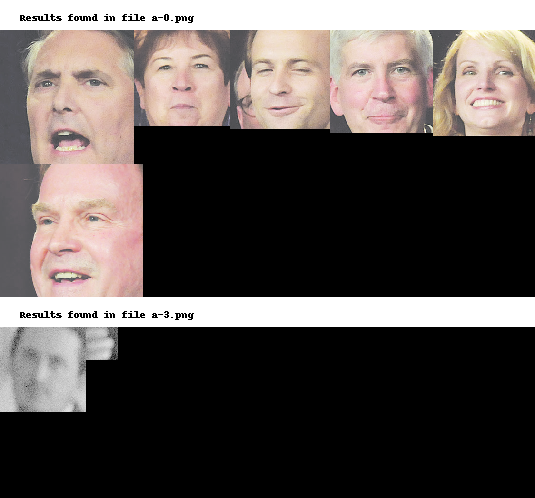

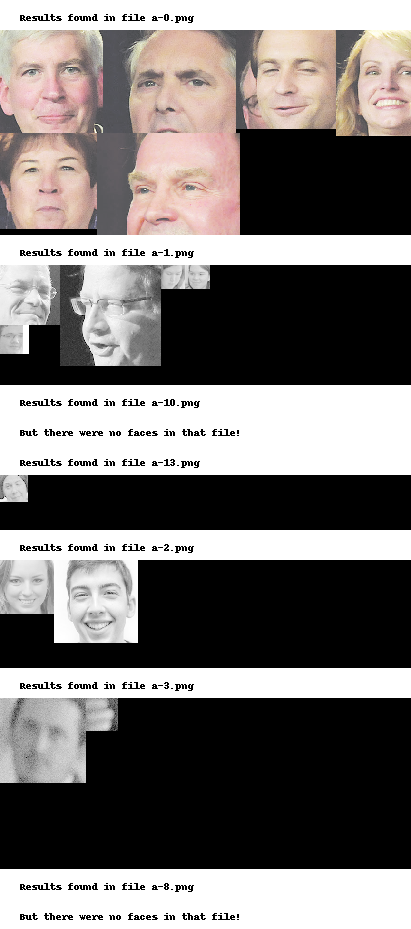

In [12]:
#Small directory files
list_of_heights = []
for pic in list_face_results:
    height = pic.height
    list_of_heights.append(height)

total_height = sum(list_of_heights)

first_pic = list_face_results[0]
second_pic = list_face_results[1]
third_contact_sheet = PIL.Image.new(first_pic.mode, (second_pic.width, total_height ))
x=0
y=0

for img4 in list_face_results:

    third_contact_sheet.paste(img4, (x,y))

    #update position
    y = y + img4.height

display(third_contact_sheet)

#Large directory files
list_of_heights2 = []
for pic in list_face_results2:
    height = pic.height
    list_of_heights2.append(height)

total_height = sum(list_of_heights2)

first_pic = list_face_results2[0]
second_pic = list_face_results2[1]
third_contact_sheet2 = PIL.Image.new(first_pic.mode, (second_pic.width, total_height ))
x=0
y=0

for img4 in list_face_results2:

    third_contact_sheet2.paste(img4, (x,y))

    #update position
    y = y + img4.height

display(third_contact_sheet2)